In this project we will implement the general **Pauli channel** in qiskit. 

As an application, we will evaluate a quantity that is relevant in quantum thermodynamics, known as extractable work, trying to reproduce the result of the paper [*G. García-Pérez et al., arXiv:1906.07099*](https://arxiv.org/abs/1906.07099).

We introduced the Pauli channel in Chapter 5 where we showed the circuit that implements it.

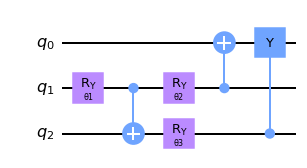

In [1]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.circuit import Parameter

#############################
#  Pauli channel on IBMQX2  #
#############################

# Quantum register
q = QuantumRegister(3, name="q")

# Quantum circuit
pauli = QuantumCircuit(q)

# Pauli channel acting on q_2
## Qubit identification
system = 0
a_0 = 1
a_1 = 2

# ## Define rotation angles
theta_1 = Parameter('θ1')
theta_2 = Parameter('θ2')
theta_3 = Parameter('θ3')

## Construct circuit
pauli.ry(theta_1, q[a_0])
pauli.cx(q[a_0], q[a_1])
pauli.ry(theta_2, q[a_0])
pauli.ry(theta_3, q[a_1])
pauli.cx(q[a_0], q[system])
pauli.cy(q[a_1], q[system])

# Draw circuit
pauli.draw(output='mpl')

At a specific time instant $t$, the Pauli channel can be written as
\begin{equation} 
 \mathcal{E} (\rho) = \sum_{i=0}^3 p_i \sigma_i \rho \sigma_i,
\end{equation}
with $0 \leq p_i \leq 1$ and $\sum_i p_i = 1$.

## Task 1

The depolarizing channel is a special case of the Pauli channel where $p_1 = p_2 = p_3 = p/4$. It can thus be implemented using the circuit above (This is one of the homework assignments). But why can't a general Pauli channel be implemented with the circuit used in the previous project, if we allow each of the three ancillary qubits to be rotated by a different angle $\theta$?

Find a counterexample of Pauli channel that can't be implemented with the circuit used in Project 1.



## Task 2
The crucial part of the circuit implementation of the Pauli channel is the inversion of the system of equations 

\begin{equation}\label{eq:pauli_equations}
    \begin{cases}
        p_1  = |\langle 01|\psi \rangle|^2 = (c_1 c_2 s_3 - s_1 s_2 c_3)^2 & \\
        p_2  = |\langle 10|\psi \rangle|^2 = (c_1 s_2 c_3 - s_1 c_2 s_3)^2 & \\
        p_3  = |\langle 11|\psi \rangle|^2 = (s_1 c_2 c_3 + c_1 s_2 s_3)^2 &
    \end{cases}
\end{equation}

where $c_i \equiv \cos 2\theta_i$ and $s_i \equiv \sin 2\theta_i$, that gives us the three angles $\theta_1$, $\theta_2$ and $\theta_3$.

The system allows for multiple solutions, but we just need to find one (we can restrict to angles between 0 and $2\pi$.

1. *Find such a solution, either analytically (e.g. by using Mathematica) or numerically (e.g. using `scipy.optimize.root`)*
2. *Implement a function that returns the circuit implementing the Pauli Channel for a list of values `[p_1, p_2, p_3]`.*


In [7]:
def pauli_channel(q, p, system, pauli_ancillae):
    """
        Apply the Pauli channel to system with probabilities p
        
    Args:
    q (QuantumRegister): the quantum register for the circuit
    system (int): index of the system qubit
    pauli_ancillae (list): list of indices of the ancillary qubits
    p (list): list of probabilities [p_1, p_2, p_3] for the Pauli channel
    
    Returns:
    A QuantumCircuit implementing the Pauli channel
    """
    
    # Write code

## Task 3

We are going to evaluate the amount of work that can be extracted by erasure in our system qubit prepared in an initially entangled state with a quantum memory Q. This quantity is relevant in quantum thermodynamics. It was introduced in *L. del Rio et al., Nature 474, 61 (2011)* and also studied in the context of non-Markovian dynamics, [*B. Bylicka et al., Sci. Rep. 6, 27989 (2016)*](https://www.nature.com/articles/srep27989) (an experimental implementation on IBM Q devices is here: [*G. García-Pérez et al., arXiv:1906.07099*](https://arxiv.org/abs/1906.07099).

We are going to implement a function that evaluates Eq. (4) of [*B. Bylicka et al., Sci. Rep. 6, 27989 (2016)*](https://www.nature.com/articles/srep27989).

*For that, we first need a `conditional_entropy` function that takes a two-qubit state vector or density operator* and returns the conditional entropy $S(A|B) = S(AB) - S(B)$ where $S$ denotes the von-Neumann entropy.

In [ ]:
# Suggested imports...
from qiskit.tools.qi.qi import entropy, partial_trace

def conditional_entropy(state, qubit_a, qubit_b):
    """Conditional entropy S(A|B) = S(AB) - S(B)
    
    Args:
        state: a vector or density operator
        qubit_a: 0-based index of the qubit A
        qubit_b: 0-based index of the qubit B
        
    Returns:
        int: the conditional entropy
    """
    # Write code here

And now you can implement the `extractable_work` function, that also takes a two-qubit system and returns the amount of extractable work.

In [ ]:
def extractable_work(state, system_qubit, memory_qubit):
    """Extractable work from a two-qubit state
    =
    Cfr. Eq. (4) Bylicka et al., Sci. Rep. 6, 27989 (2016)
    
    Args:
        qubit_a: 0-based index of the system qubit S
        qubit_b: 0-based index of the memory qubit M
    """
    # Write code here

## Task 4

We are now going to implement two different types of dynamics, i.e. functions that return the values of p as function of time. One is a non-CP-divisible map (see [Chapter 8](https://matteoacrossi.github.io/open_quantum_systems_course/non-markovian_quantum_dynamics.html))

    p_ncp =  [1/4 * (1 - np.exp(-2 * t *eta)), 
              1/4 * (1 - np.exp(-2 * t *eta)),
              1/4 * (1 + np.exp(-2 * t * eta) - 2 *np.exp(-t *eta) * np.cosh(t *omega))]
         
and the other is eternally non-Markovian (cf. [*G. García-Pérez et al., arXiv:1906.07099*](https://arxiv.org/abs/1906.07099))

    p_enm = [1/4 * (1 - np.exp(-2 * t *eta)), 
             1/4 * (1 - np.exp(-2 * t *eta)),
             1/4 * (1 + np.exp(-2 * t * eta) - 2 *np.exp(-t *eta) * np.cos(t *omega))]

1. Write the functions `p_ncp(t)` and `p_enm(t)` that return the circuit simulating the Pauli channel at time $t$ for the two dynamics above.
1. Write a circuit in which you prepare two qubits (the system and memory) in a $|\Psi^-\rangle$ state.
3. Let's use the following time steps and parameters for the dynamics.

        t_values = np.linspace(0, 3, 11)

        params_ncp = {'eta': 0.1, 'omega': 2.0}
        params_enm = {'eta': 1.0, 'omega': 0.5}

    write the circuits implementing the dynamics for each of the `t_values`, and append two-qubit tomography circuits (for the system and memory qubit) to them.
   
4. Execute the circuits on the simulator, collect the results and plot the extractable work as a function of time for both dynamics.


## Homework

1. Use the circuit of the general Pauli channel to implement the depolarizing channel on the real machine, and compare the experimental outcome with the ones from the previous project. Which one has higher fidelities?

2. Run the code above on a real device and compare it with the simulation.